<div class="alert alert-block alert-info">
    <b> Key Principles </b><br>
- This notebook will take a sample dataset and walk through the basics of visualization in Matplotlib. <br>
- Rather than being intended to show how to create lots of different viz, it will walk through the fundamentals of creating and manipulating a visualization object using the Matplotlib language, the basis for most Python data visualization.
    
</div>

# 0. Prepare Notebook

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Import Data Step** <br>
- Elo is a measure of team strength created by 538. Thre greater a team's Elo rating, the better. <br>
- In the below dataset, the fields we'll care most about are the year_id, fran_id, seasongame (which game of the season is it?), and the elo_i (a team's Elo rating coming into the game).

In [11]:
# Import 538 Elo csv (https://github.com/fivethirtyeight/data/tree/master/nba-elo)
elo = pd.read_csv('sample_data/nbaallelo.csv')
elo.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


# Enhancing a Simple Default Graph

### 1. Let's plot a simple time series look at the Elo rating over time for recent championship teams.
An easy way to do this is to grab the Elo rating for each team in the first game of each season.

In [12]:
elo_in = elo[elo["seasongame"] == 1]
champs = ['Raptors', 'Warriors', 'Lakers', 'Spurs', 'Heat', 'Cavaliers', 
          'Celtics', 'Mavericks', 'Bulls', 'Rockets', 'Pistons']

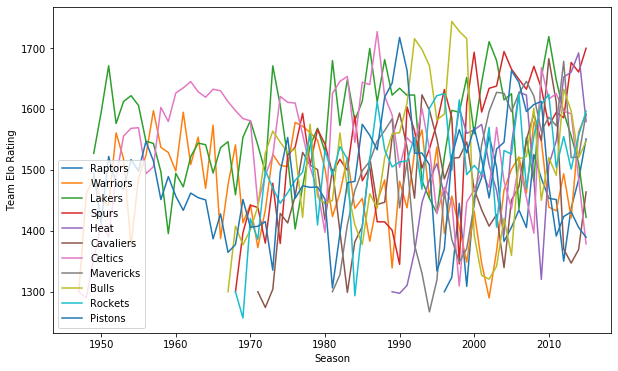

In [13]:
# This is the basic pyplot module... we'll feed in an x-axis value, y-axis value, and let it go to work!
# The commands below do exactly what you think they do, nothing fancy.

# Initialize Figure
plt.figure(figsize=(10, 6))

# Plot a line for each team in our list of recent champions.
for i in champs:
    plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], label=i)

# Add some basic guides, like a legend and axis labels.
plt.legend()
plt.xlabel('Season')
plt.ylabel('Team Elo Rating')
plt.show()

### 2. Yay! What a jumbled mess... So this is fairly unusable, but where do we start with improvements? For starters, let's move the legend.

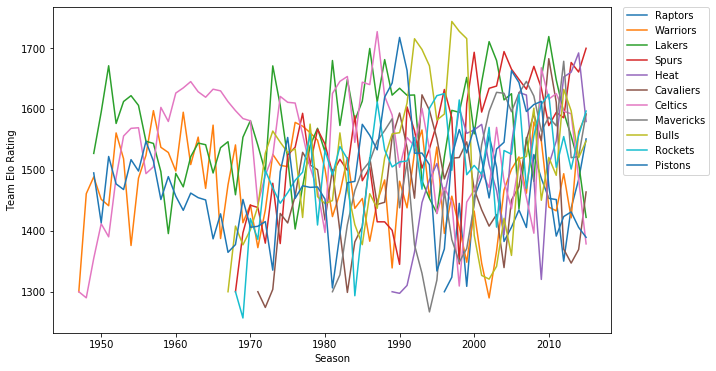

In [14]:
plt.figure(figsize=(10,6))
for i in champs:
    plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], label=i)
    
# These specifications allow us to move the legend to a far more effective location.
# bbox_to_anchor allows us to specify where we want to place the top left corner of the legend's bounding box
# (1, 1) would be the top right corner of our graph object, 
# and 'upper left' specifies that we're anchoring the upper left corner of the legend box
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0., loc='upper left')

plt.xlabel('Season')
plt.ylabel('Team Elo Rating')
plt.show()

### 3. Alright, let's figure out what story we're actually trying to tell. This will help us figure out a better way to use color. What about Warriors vs. Lakers over time?

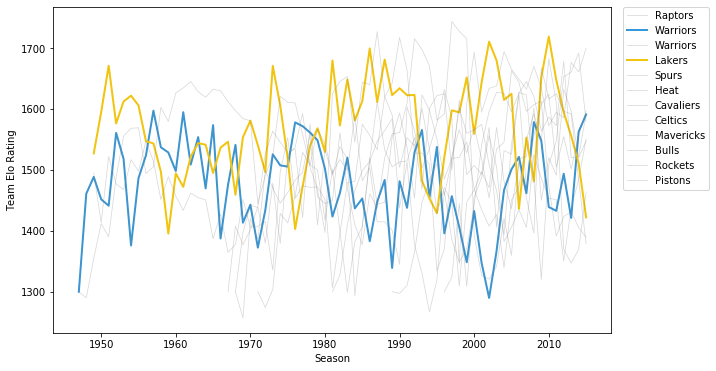

In [15]:
plt.figure(figsize=(10, 6))
for i in champs:
    # We'll mark the Warriors and Lakers using hex color codes. 
    # For additional emphasis, we'll bold out their individual lines.
    # On the flip size, everyone else is just background, so we'll color them gray and increase opacity to fade them.
    if i == 'Warriors':
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#3498db', linewidth=2)
    if i == 'Lakers':
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#f1c40f', linewidth=2)
    else:
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='gray', linewidth=0.75, alpha=0.3)
        
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0., loc='upper left')

plt.xlabel('Season')
plt.ylabel('Team Elo Rating')
plt.show()

### 4. Cool, but what is this telling me really? What's the significance? If an Elo rating of 1500 is roughly average... How about adding a reference baseline?

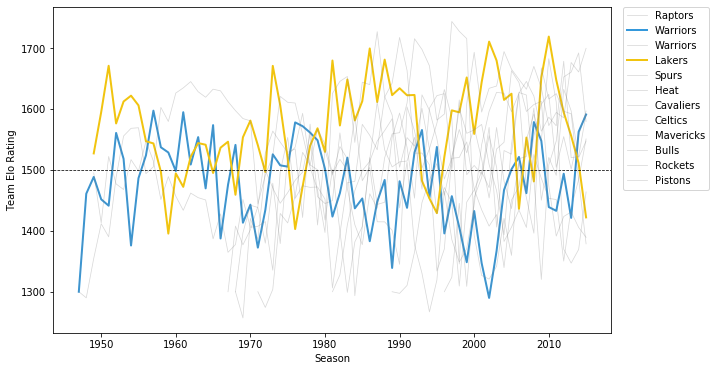

In [39]:
plt.figure(figsize=(10, 6))
for i in champs:
    if i == 'Warriors':
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#3498db', linewidth=2)
    if i == 'Lakers':
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#f1c40f', linewidth=2)
    else:
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='gray', linewidth=0.75, alpha=0.3)
        
# We can draw a horizontal line using the axhline method and make it dashed to emphasize it's a reference.
# Since the background lines are already gray, let's make the reference line black to set it apart.
# Linestyle lets us specify that we want a dashed line, not the default solid.
plt.axhline(1500, color='black', linewidth=0.75, linestyle='--')
        
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0., loc='upper left')

plt.xlabel('Season')
plt.ylabel('Team Elo Rating')
plt.show()

### 5. Do we actually care about a legend for all the different gray lines? How about using annotations instead?

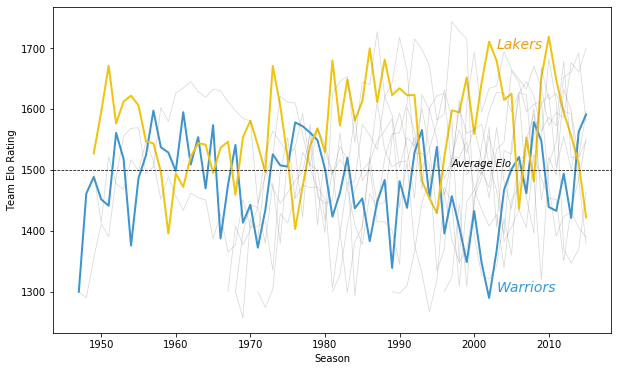

In [22]:
plt.figure(figsize=(10, 6))
for i in champs:
    if i == 'Warriors':
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#3498db', linewidth=2)
    if i == 'Lakers':
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#f1c40f', linewidth=2)
    else:
        plt.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='gray', linewidth=0.75, alpha=0.3)
        
plt.axhline(1500, color='black', linewidth=0.75, linestyle='--')
        
# We can call the text method to add annotations to our graph, dispensing of the need for a legend now.
# Text is anchored on the X, Y coordinates of the graph input data.
# The fontstyle parameter lets us italicize the annotations. Options are: (['normal' | 'italic' | 'oblique'])
plt.text(1997, 1505, 'Average Elo', fontsize=10, fontstyle='italic', color='black')
plt.text(2003, 1700, 'Lakers', fontsize=14, fontstyle='italic', color='#f39c12')
plt.text(2003, 1300, 'Warriors', fontsize=14, fontstyle='italic', color='#3498db')

plt.xlabel('Season')
plt.ylabel('Team Elo Rating')
plt.show()

### 6. Before we go any further, let's move away from the defaults and dive into axis notation to unlock our graph.

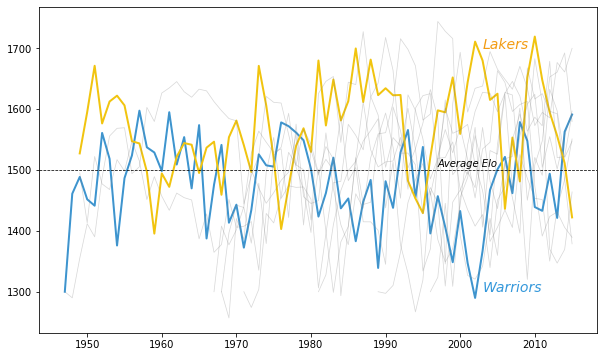

In [25]:
# In Matplotlib, a figure is your overall canvas. An axis is an object within that canvas.
# So even though we're plotting only one graph right now, it's best practice to switch everything into 
# axis notation in order to fully unlock the customization potential of our graph.
fig = plt.figure(figsize=(10, 6))

# We create an axis object by calling the add_subplot method, with inputs:(<total rows>, <total columns>, <axis ID>)
ax = fig.add_subplot(1, 1, 1)

for i in champs:
    if i == 'Warriors':
        ax.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#3498db', linewidth=2)
    if i == 'Lakers':
        ax.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#f1c40f', linewidth=2)
    else:
        ax.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='gray', linewidth=0.75, alpha=0.3)
        
ax.axhline(1500, color='black', linewidth=0.75, linestyle='--')

ax.text(1997, 1505, 'Average Elo', fontsize=10, fontstyle='italic', color='black')
ax.text(2003, 1700, 'Lakers', fontsize=14, fontstyle='italic', color='#f39c12')
ax.text(2003, 1300, 'Warriors', fontsize=14, fontstyle='italic', color='#3498db')

plt.show()

### 7. Now we can make some stylistic adjustments to really spruce it up.

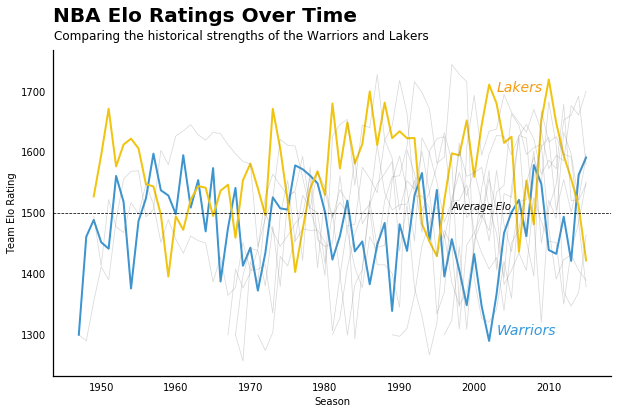

In [37]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)

for i in champs:
    if i == 'Warriors':
        ax.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#3498db', linewidth=2)
    if i == 'Lakers':
        ax.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='#f1c40f', linewidth=2)
    else:
        ax.plot(elo_in[elo_in['fran_id'] == i]['year_id'], elo_in[elo_in['fran_id'] == i]['elo_i'], 
                 label=i, color='gray', linewidth=0.75, alpha=0.3)
        
ax.axhline(1500, color='black', linewidth=0.75, linestyle='--')

ax.text(1997, 1505, 'Average Elo', fontsize=10, fontstyle='italic', color='black')
ax.text(2003, 1700, 'Lakers', fontsize=14, fontstyle='italic', color='#f39c12')
ax.text(2003, 1300, 'Warriors', fontsize=14, fontstyle='italic', color='#3498db')

# Let's start by turning off the outer spines on the top and right.
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# We'll keep the left and bottom spines to bring it closer to a professionally styled graph
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.25)
ax.spines['bottom'].set_linewidth(1.25)

# A grid would clutter up this particular graph, but if you wanted one, this is how you'd do so (commented out):
# ax.grid(linestyle='-', color='#D3D3D3', zorder=0)
# We'll gloss over it for now, but the zorder parameter above lets us determine the order in which 
# all of our graph's objects are placed on top of each other (0 being the farthest back)

# Finally let's turn off those tick marks on the axes
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.set_xlabel('Season')
ax.set_ylabel('Team Elo Rating')

# Here's a trick for nice, professional titles on our graphs.
# Create a main title that's bolded and set it off to the left. Make sure to insert an '/n' so that we get a new line.
# Then use the text method to create a sub-heading under the main title where we carved out the space.
# BTW, these are our fontweight options: ['normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight']
plt.title("NBA Elo Ratings Over Time \n", fontweight='heavy', fontsize=20, loc='left')
ax.text(1943.7, 1785, "Comparing the historical strengths of the Warriors and Lakers", 
        fontsize=12, fontweight='light')

plt.show()